# Static routing simulation

### Project description

    The project's goal is to build a fast and easy-to-use simulation for static packet routing.
    The simluation consists of several configurable modules.
    The main modules are:
    - The network: its size, topology and link capacity are adjustable.
    - The injection pattern, AKA policy: defines how packets are injected into the network, and the static route per packet.
    - The buffer type: FIFO, longest in system, etc.
    - The routing algorithm, can be centralized or distributed: defines how many packets to send the different buffers.

    The system verify that the injection pattern is feasible (in link capacity manner).
    At the end of each simulation the results are gathered and visualization utility functions are provided.
    In the next document, some features and results are shown.
    The code is in this link: 
<a href=https://github.com/efectivo/network_sim>SOURCE_CODE</a>

In [16]:
import sys
import os
import simulation, network_factory, policy, algo, units, buffer, collections
import random
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Network creation, randomization and visualization

    The network graph, can be directed or indirected. Link capacities are optional, the default capacity is 1.
    Functions for graph creation are provided, in the module "network_factory", as well as some visualization options.
    Here are two examples to create random DAG and undirected line graph and to plot them:

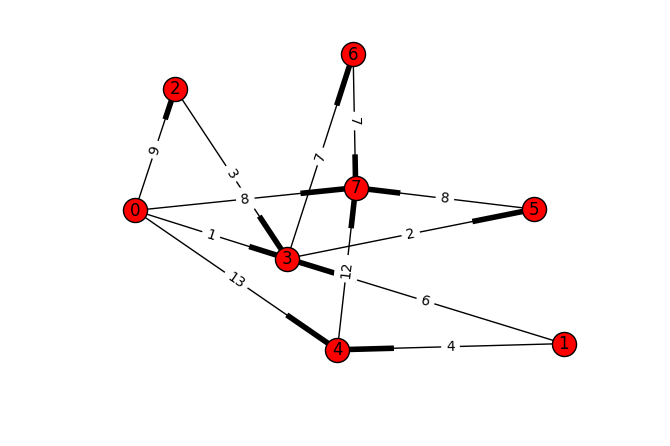

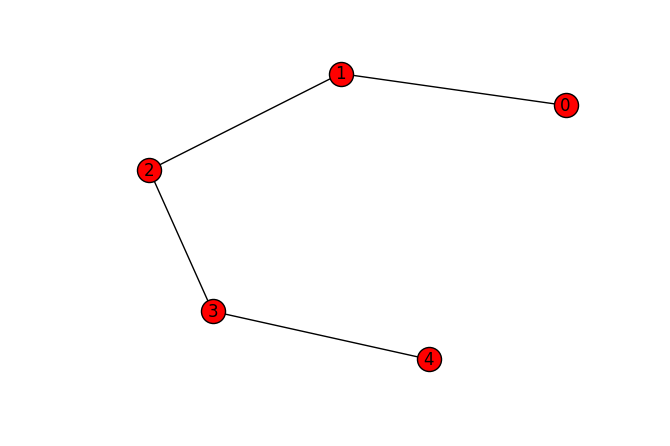

In [9]:
network_factory.draw(network_factory.create_random_weighted_dag(8, 15))
network_factory.draw(network_factory.create_path_graph(5))

### Algorithm comparison for line graph
    As a test case, we used the line graph from above. 
    The injection pattern is a single packet from a random source every cycle, where the sink is constant, at the end of the line.
    In each graph node, there is a LongestInSystem buffer, meaning that the when the algorithm wants to send a packet from a node, the oldest packet will be extracted from the buffer.
    The results are shown below.

Total sent: 15
Total recv: 10
Avg cycles: 4


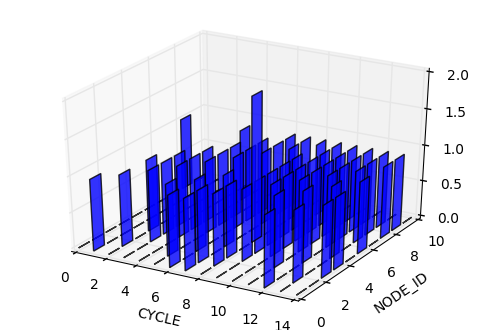

In [20]:
net = network_factory.create_path_graph(10)
policies = [policy.RandomSrcSameDest(net)]
cycles = 15
s = simulation.Sim(algo.Greedy, net, policies, buffer.LongestInSystem, cycles, verbose=False)
s.run()
s.reporter.print_stats()
s.reporter.plot_buffer_state()

    Buffer visualization is good for debugging purposes, as it shows the buffer state per node and cycle.
    The next graph shows the statistics per buffer:

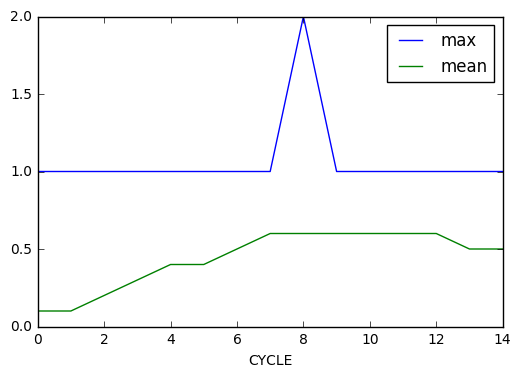

In [21]:
s.reporter.plot_graphs()

    Now let's compare three algorithms:
    - Greedy: always send a buffer to the next node.
    - DownHill: sends a buffer to the next node, if it's buffer size is smaller than its own.
    - OddEven: a DownHill variation, sends a packet also when the buffer size are equal and its size is odd.
    For comparison, 30 nodes graph was chosen, and run for 50 times. The maximum buffer sizes at each run were gathered.

In [22]:
net = network_factory.create_path_graph(30)
policies = [policy.RandomSrcSameDest(net)]

res = collections.defaultdict(list)
for alg in [algo.Greedy, algo.DownHill, algo.OddEven]:
    for i in range(50):
        s = simulation.Sim(alg, net, policies, buffer.LongestInSystem, 1000, False)
        s.run()
        res[alg.__name__].append(s.reporter.df.BUF.max())

    Now the buffer size statistics:

In [30]:
print pd.DataFrame(res).describe()

        DownHill     Greedy    OddEven
count  50.000000  50.000000  50.000000
mean   13.140000   5.520000   3.100000
std     0.495284   0.952762   0.303046
min    12.000000   4.000000   3.000000
25%    13.000000   5.000000   3.000000
50%    13.000000   5.500000   3.000000
75%    13.000000   6.000000   3.000000
max    14.000000   8.000000   4.000000
